In [1]:
import kdezero
import kdezero.functions as F
from kdezero.models import MLP
import numpy as np

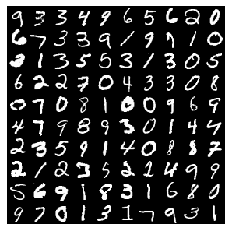

In [2]:
train_set = kdezero.datasets.MNIST(train=True)
train_set.show()

In [3]:
test_set = kdezero.datasets.MNIST(train=False)
print(len(train_set))
print(len(test_set))

60000
10000


In [4]:
batch_size = 100
train_loader = kdezero.DataLoader(train_set, batch_size)
test_loader = kdezero.DataLoader(test_set, batch_size, shuffle=False)

In [5]:
hidden_size = 1000

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = kdezero.optimizers.Adam()
optimizer.add_hook(kdezero.optimizers.WeightDecay(1e-4))

In [7]:
model.compile(max_epoch=5, acc=F.accuracy, gpu=True)

In [8]:
model.fit_generator(train_loader)

set gpu
epoch: 1
train loss: 0.19200364662955205, accuracy: 0.94095
epoch: 2
train loss: 0.07404459354661716, accuracy: 0.9776333333333334
epoch: 3
train loss: 0.05072844205230164, accuracy: 0.9840166666666667
epoch: 4
train loss: 0.03726230797571285, accuracy: 0.9879166666666667
epoch: 5
train loss: 0.02592113249838197, accuracy: 0.9911


In [10]:
x, t = test_set[0]
x = np.array([x])
x = kdezero.cuda.as_cupy(x)
x.shape

(1, 784)

In [11]:
t = np.array([t])
t = kdezero.cuda.as_cupy(t)
t.shape

(1,)

In [12]:
y = model(x)
print(y)
pred = y.data.argmax(axis=1)
print(pred)
F.accuracy(y, t)

variable([[ -9.918165   -4.3586597  -4.473551    2.5159423  -8.397677   -6.9708943
           -14.880915   15.426784   -7.879976    1.6910261]])
[7]


variable(1.0)

In [13]:
model2 = MLP((hidden_size, hidden_size, 10), activation=F.relu)

In [14]:
model2.fit_generator(train_loader)

Exception: Compilation is not complete